In [10]:
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class NadarayaWatsonRegrWithGaussKer:
    def __init__(self, X, Y):
        self._a = 5
        self.__X = np.array(X)
        self.__dim = X.shape[1] if len(X.shape) == 2 else 1
        self.__X = self.__X.reshape((X.shape[0], self.__dim))
        self.__Y = np.array(Y)
        if X.shape[0] != Y.shape[0]:
            raise ValueError('Пожалуйста, введите списки аргументов и значений функций одинаковой длины')
        
    
    @staticmethod
    def gaussKernel(r):
        return np.exp(-1/2 * r**2)
    
    
    def checkArguments(self):
        return self.__X
    
    
    def checkFunctionValues(self):
        return self.__Y
    
    
    def checkDimension(self):
        return self.__dim
        
        
    def __call__(self, x0, window):
        x0 = np.array(x0)
        if len(x0.shape) == 1 and self.__dim != 1 or len(x0.shape) == 2 and self.__dim != x0.shape[1]:
            raise ValueError('Пожалуйста, введите вектор соответствующей размерности.\n'
                             'Чтобы проверить размерность аргументов, вызовите метод .checkDimension()')
        else:
            kernelVector = NadarayaWatsonRegrWithGaussKer.gaussKernel(norm(self.__X - x0, axis=1) / window)
            return np.dot(self.__Y, kernelVector) / sum(kernelVector)

In [12]:
X = np.arange(-np.pi, np.pi, 0.4)
Y = np.sin(X)

In [13]:
X.shape

(16,)

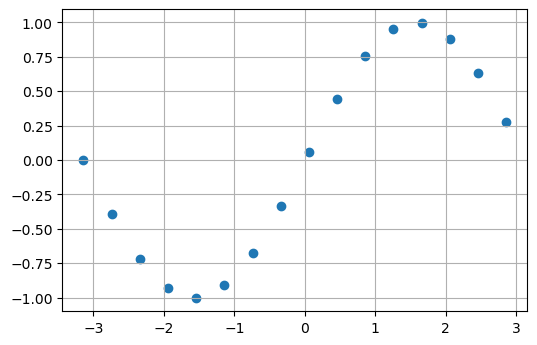

In [14]:
plt.figure(dpi=100)
plt.scatter(X, Y)
plt.grid()

In [15]:
solver = NadarayaWatsonRegrWithGaussKer(X, Y)

In [16]:
x0 = np.linspace(-np.pi, np.pi, 100)

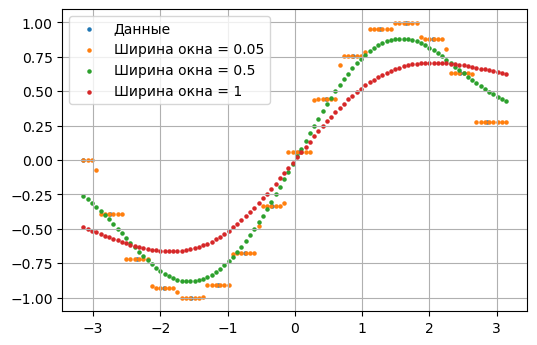

In [21]:
plt.figure(dpi=100)
plt.scatter(X, Y, s=5, label='Данные')
for h in [0.05, 0.5, 1]:
    y0 = [solver(x, h) for x in x0]
    plt.scatter(x0, y0, s=5, label=f'Ширина окна = {h}')
plt.legend()
plt.grid()